In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [115]:
df.shape

(5110, 12)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [117]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [118]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [119]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [120]:
from sklearn.impute import KNNImputer

In [121]:
imputer = KNNImputer(n_neighbors= 5)
df['bmi']=imputer.fit_transform(df[['bmi']])

In [122]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [123]:
n_df = df[['id','age','hypertension','heart_disease',	'avg_glucose_level']]
n_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level
0,9046,67.0,0,1,228.69
1,51676,61.0,0,0,202.21
2,31112,80.0,0,1,105.92
3,60182,49.0,0,0,171.23
4,1665,79.0,1,0,174.12


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

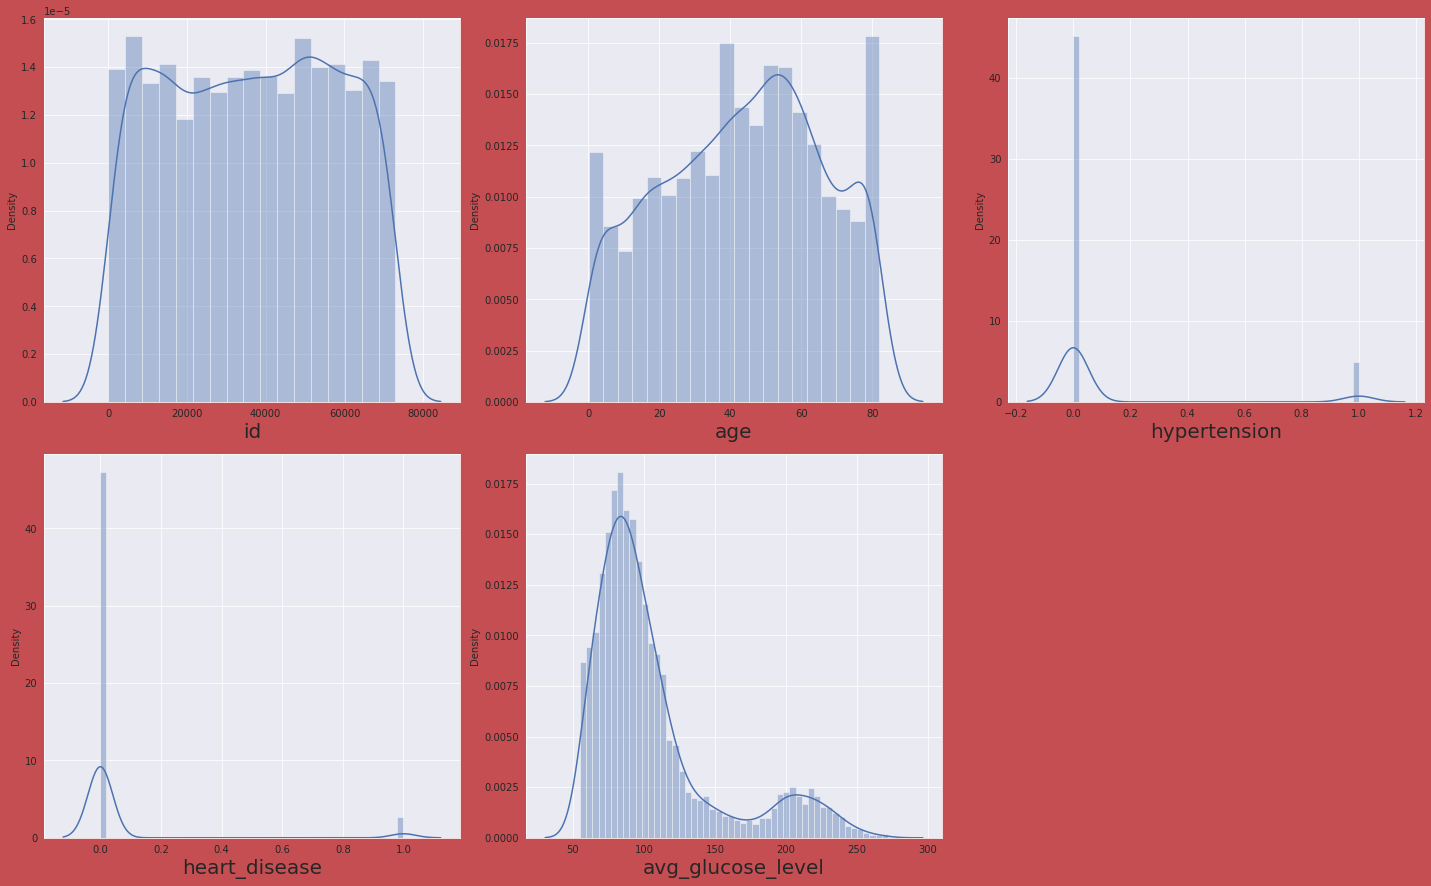

In [124]:
plt.figure(figsize=(20,30),facecolor ="r")
plotnumber=1

for column in n_df:
  if plotnumber<=15:
    ax = plt.subplot(5,3,plotnumber)
    sns.distplot(n_df[column])
    plt.xlabel(column,fontsize = 20)

  plotnumber+=1
plt.tight_layout()   
plt.show() 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

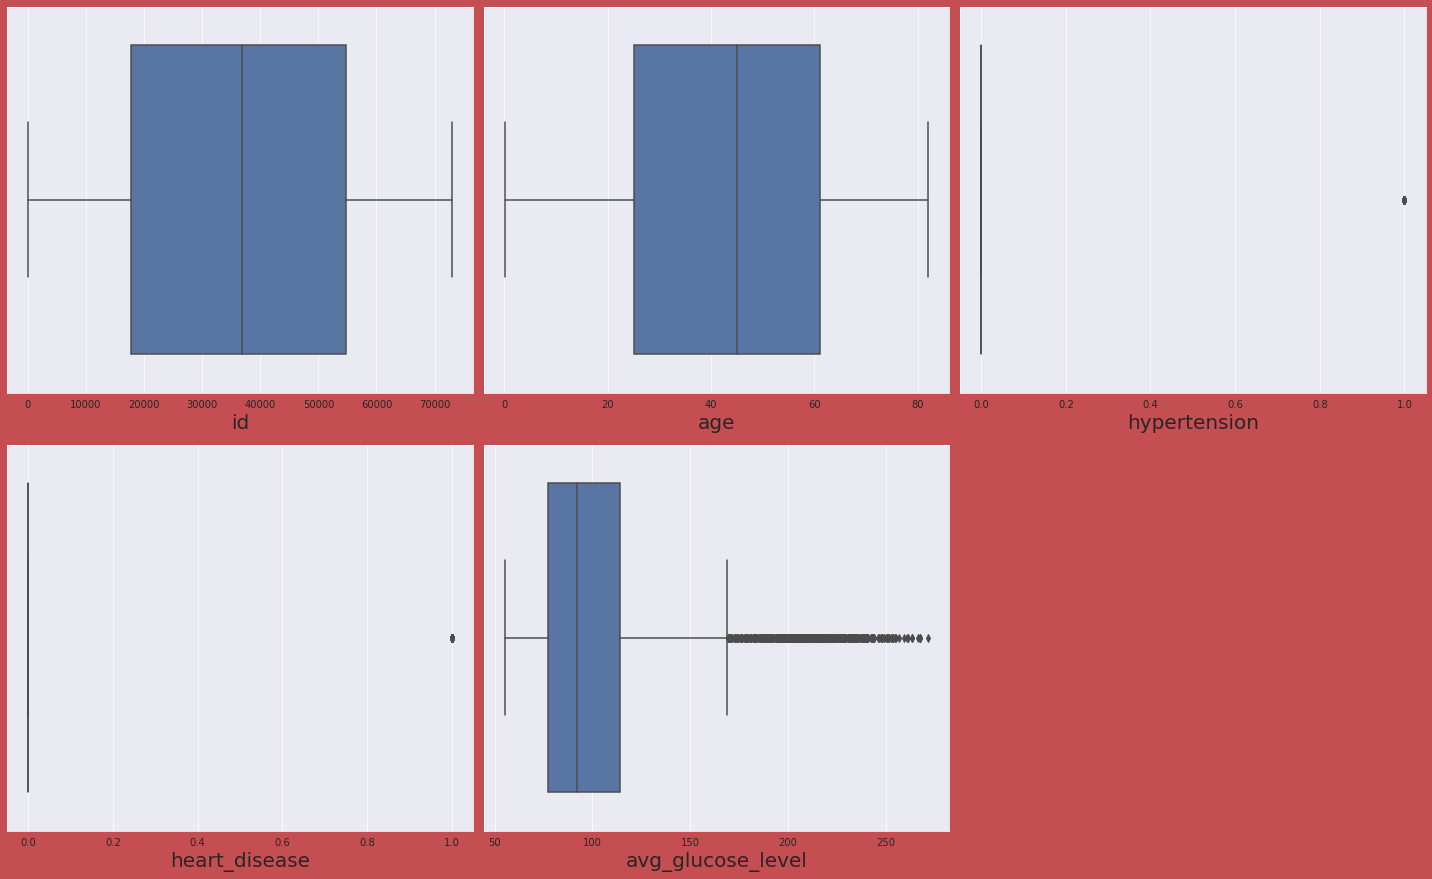

In [125]:
plt.figure(figsize=(20,30),facecolor ="r")
plotnumber=1

for column in n_df:
  if plotnumber<=15:
    ax = plt.subplot(5,3,plotnumber)
    sns.boxplot(n_df[column])
    plt.xlabel(column,fontsize = 20)

  plotnumber+=1
plt.tight_layout()   
plt.show() 

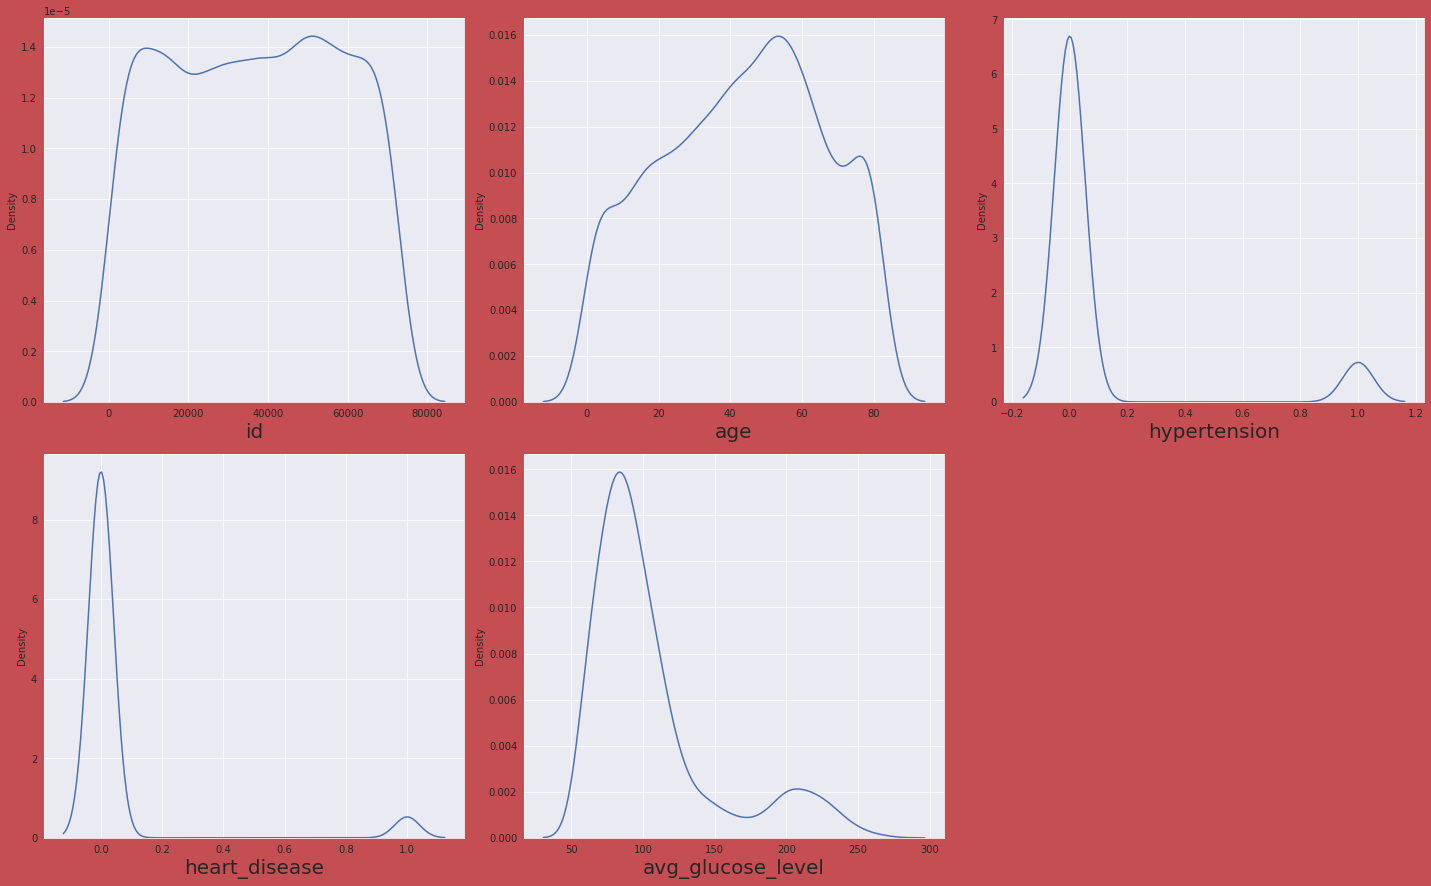

In [126]:
plt.figure(figsize=(20,30),facecolor ="r")
plotnumber=1

for column in n_df:
  if plotnumber<=15:
    ax = plt.subplot(5,3,plotnumber)
    sns.kdeplot(n_df[column])
    plt.xlabel(column,fontsize = 20)

  plotnumber+=1
plt.tight_layout()   
plt.show() 

In [127]:
# categorical columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


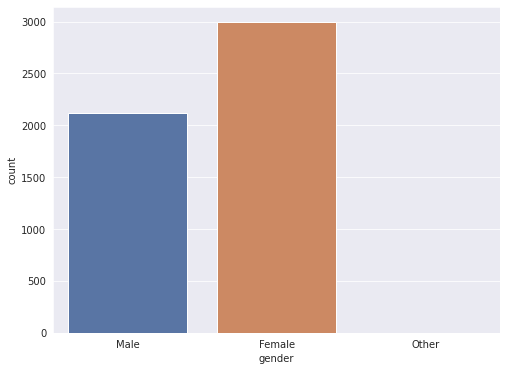

In [128]:
sns.countplot(df['gender'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


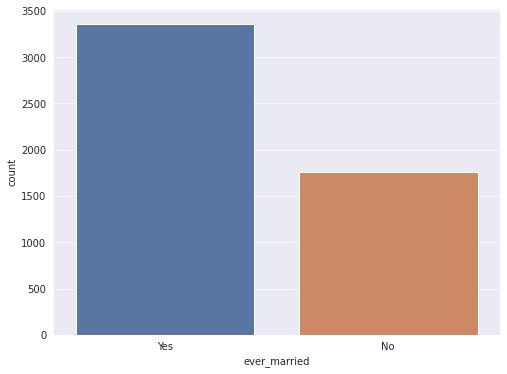

In [129]:
'''id	gender	age	hypertension	heart_disease	ever_married	work_type	Residence_type	avg_glucose_level	bmi	smoking_status	stroke'''
sns.countplot(df['ever_married'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


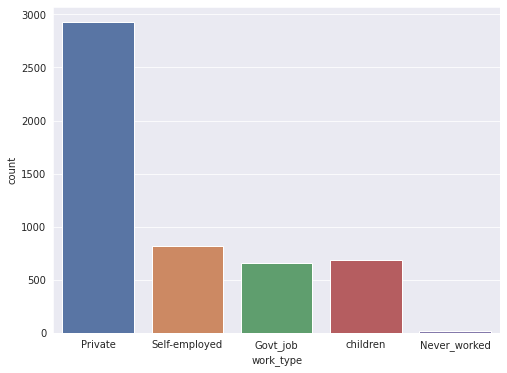

In [130]:
sns.countplot(df['work_type'])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


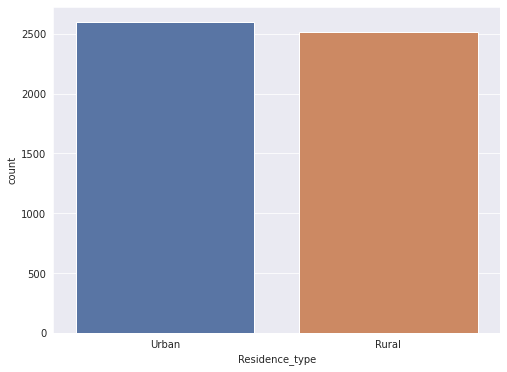

In [131]:
sns.countplot(df['Residence_type'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


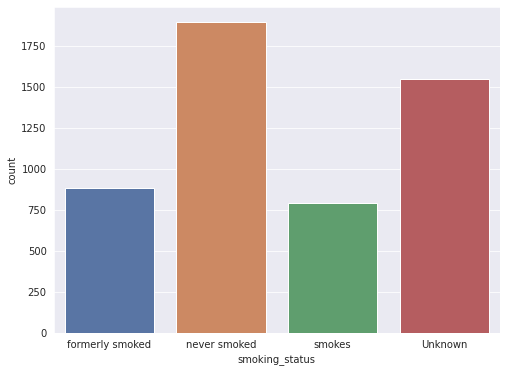

In [132]:
sns.countplot(df['smoking_status'])
plt.show()

In [133]:
df.head

<bound method NDFrame.head of          id  gender   age  ...        bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.600000  formerly smoked      1
1     51676  Female  61.0  ...  28.893237     never smoked      1
2     31112    Male  80.0  ...  32.500000     never smoked      1
3     60182  Female  49.0  ...  34.400000           smokes      1
4      1665  Female  79.0  ...  24.000000     never smoked      1
...     ...     ...   ...  ...        ...              ...    ...
5105  18234  Female  80.0  ...  28.893237     never smoked      0
5106  44873  Female  81.0  ...  40.000000     never smoked      0
5107  19723  Female  35.0  ...  30.600000     never smoked      0
5108  37544    Male  51.0  ...  25.600000  formerly smoked      0
5109  44679  Female  44.0  ...  26.200000          Unknown      0

[5110 rows x 12 columns]>

In [134]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [135]:
df.smoking_status.nunique()

4

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [137]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [138]:
gender = pd.get_dummies(df[['gender']],drop_first=True)
gender.head()

,gender_Male,gender_Other
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [139]:
ever_married = pd.get_dummies(df[['ever_married']],drop_first=True)
ever_married.head()

,ever_married_Yes
0,1
1,1
2,1
3,1
4,1


In [140]:
work_type = pd.get_dummies(df[['work_type']],drop_first=True)
work_type.head()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


In [141]:
Residence_type = pd.get_dummies(df[['Residence_type']],drop_first=True)
Residence_type.head()

,Residence_type_Urban
0,1
1,0
2,0
3,1
4,0


In [142]:
smoking_status = pd.get_dummies(df[['smoking_status']],drop_first=True)
smoking_status.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [143]:
data=pd.concat([df,gender,ever_married,work_type,Residence_type,smoking_status],axis=1)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0,0,1,0,0,1,0,0,0,1,0


In [144]:
data = data.drop(columns=['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [145]:
data = data.drop(columns=['id'])
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [146]:
correlation = data.corr()
correlation

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257,-0.027623,-0.010659,0.679125,-0.078653,0.116534,0.327989,-0.634215,0.014180,0.236897,0.119307,0.073133
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904,0.021275,-0.004597,0.164243,-0.021608,-0.005413,0.115442,-0.129506,-0.007913,0.058853,0.065063,0.031240
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914,0.085717,-0.003343,0.114644,-0.015712,0.000027,0.086760,-0.091634,0.003092,0.066804,-0.021856,0.044049
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945,0.054580,0.011489,0.155068,-0.014675,0.016588,0.062694,-0.102250,-0.004946,0.068111,0.023885,0.017646
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947,-0.025464,-0.011802,0.335705,-0.028600,0.203884,0.070822,-0.442843,-0.000120,0.104257,0.106220,0.085579
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000,0.009117,-0.003166,0.108340,-0.014882,0.011888,0.062168,-0.083869,0.015458,0.064556,-0.004129,0.008939
gender_Male,-0.027623,0.021275,0.085717,0.054580,-0.025464,0.009117,1.000000,-0.011757,-0.029936,0.011496,-0.032639,-0.025971,0.089283,-0.005937,0.042738,-0.098813,0.011477
gender_Other,-0.010659,-0.004597,-0.003343,0.011489,-0.011802,-0.003166,-0.011757,1.000000,-0.019327,-0.000920,0.012092,-0.006112,-0.005514,-0.014217,0.030568,-0.010728,-0.005978
ever_married_Yes,0.679125,0.164243,0.114644,0.155068,0.335705,0.108340,-0.029936,-0.019327,1.000000,-0.090838,0.153830,0.192716,-0.544441,0.006261,0.171256,0.102845,0.105226
work_type_Never_worked,-0.078653,-0.021608,-0.015712,-0.014675,-0.028600,-0.014882,0.011496,-0.000920,-0.090838,1.000000,-0.076081,-0.028728,-0.025915,0.022859,-0.030095,0.036238,-0.028099


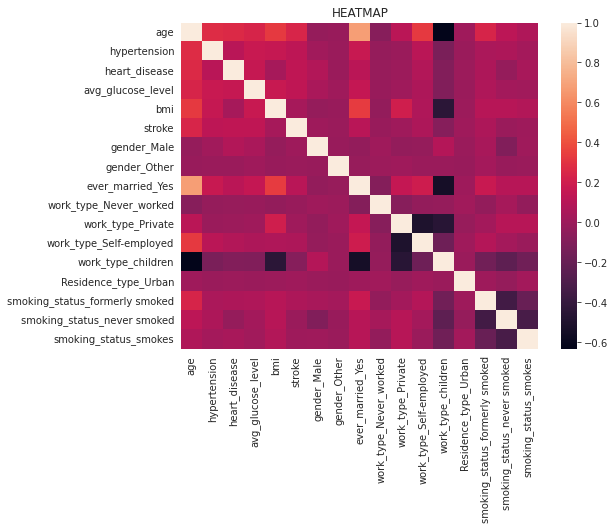

In [147]:
sns.set({'figure.figsize':(8,6)})
sns.heatmap(data=correlation)
plt.title('HEATMAP')
plt.show()

In [148]:
X = data.drop(columns=['stroke'],axis =1)
print(X)

       age  hypertension  ...  smoking_status_never smoked  smoking_status_smokes
0     67.0             0  ...                            0                      0
1     61.0             0  ...                            1                      0
2     80.0             0  ...                            1                      0
3     49.0             0  ...                            0                      1
4     79.0             1  ...                            1                      0
...    ...           ...  ...                          ...                    ...
5105  80.0             1  ...                            1                      0
5106  81.0             0  ...                            1                      0
5107  35.0             0  ...                            1                      0
5108  51.0             0  ...                            0                      0
5109  44.0             0  ...                            0                      0

[5110 rows x 16

In [149]:
y = data[['stroke']]
print(y)

      stroke
0          1
1          1
2          1
3          1
4          1
...      ...
5105       0
5106       0
5107       0
5108       0
5109       0

[5110 rows x 1 columns]


In [150]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
X = Sc.fit_transform(X)

In [151]:
X

array([[ 1.05143428, -0.32860186,  4.18503199, ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.78607007, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 1.62639008, -0.32860186,  4.18503199, ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [-0.36384151, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 0.34379639, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.03420481, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326]])

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [153]:
X_train

array([[ 0.52070586, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 ,  2.34020354],
       [ 0.52070586, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [-0.40806888, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       ...,
       [-0.54075099, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 0.07843218, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 ,  2.34020354],
       [ 1.09566165, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326]])

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [155]:

models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("DescisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
models.append(("SupportVector",SVC()))
models.append(("KNeighbors",KNeighborsClassifier()))


In [156]:


for name,model in models:
    model.fit(X_train,y_train)
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    print(name,"train score =",train_score)
    print(name,"test score =",test_score)

LogisticRegression train score = 0.9537671232876712
LogisticRegression test score = 0.9403131115459883
DescisionTree train score = 1.0
DescisionTree test score = 0.9187866927592955


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForest train score = 1.0
RandomForest test score = 0.9363992172211351


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SupportVector train score = 0.9547455968688845
SupportVector test score = 0.9412915851272016


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighbors train score = 0.9549902152641878
KNeighbors test score = 0.9393346379647749


In [157]:
model = RandomForestClassifier(max_depth=3)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
probablities = model.predict_proba(X_test)
model.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9412915851272016

In [158]:
model = SVC( probability=True)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
probablities = model.predict_proba(X_test)
model.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9412915851272016

In [159]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction))

[[962   0]
 [ 60   0]]


In [160]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       962
           1       0.00      0.00      0.00        60

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.89      0.94      0.91      1022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
